In [59]:
# Dependencies
import requests
import time
import os
import pandas as pd
import json
import matplotlib.pyplot as plt


In [60]:
# Built this function to turn the data read in by the NYT data into lists objects.
def listify(l) : 
    l = l.replace('[','')
    l = l.replace(']','')
    return l.split('|')



In [61]:
# Read in the NASDAQ data
ndx_df = pd.read_csv("data/NDX.csv", parse_dates=["Date"], date_format="%Y-%m-%d")
display(ndx_df.info())
display(ndx_df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


None

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-11,7621.399902,7621.399902,7580.709961,7594.890137,7594.890137,1969480000


In [62]:
# Read in the US Economy Headlines
econ_2019_df = pd.read_csv("data/us_economy_headlines_2019.csv", parse_dates=["datetime"], date_format="ISO8601")
econ_2020_df = pd.read_csv("data/us_economy_headlines_2020.csv", parse_dates=["datetime"], date_format="ISO8601")
econ_2021_df = pd.read_csv("data/us_economy_headlines_2021.csv", parse_dates=["datetime"], date_format="ISO8601")
econ_2022_df = pd.read_csv("data/us_economy_headlines_2022.csv", parse_dates=["datetime"], date_format="ISO8601")
econ_2023_df = pd.read_csv("data/us_economy_headlines_2023.csv", parse_dates=["datetime"], date_format="ISO8601")
econ_2024_df = pd.read_csv("data/us_economy_headlines_2024.csv", parse_dates=["datetime"], date_format="ISO8601")

# Merge the dataframes
headlines_df = pd.concat([econ_2019_df,econ_2020_df,econ_2021_df,econ_2022_df,econ_2023_df,econ_2024_df], axis=0)

# Clean up the keywords column, turn it into a proper list.
headlines_df["keywords"] = headlines_df["keywords"].apply(listify)

# Build a column that's just a date, which corresponds to the NDX data.
headlines_df["Date"] = headlines_df["datetime"].dt.date
headlines_df["Date"] = pd.to_datetime(headlines_df["Date"])

display(headlines_df.info())
display(headlines_df.head(1))


<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, 0 to 58
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datetime  1651 non-null   datetime64[ns, UTC]
 1   headline  1651 non-null   object             
 2   keywords  1651 non-null   object             
 3   Date      1651 non-null   datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), object(2)
memory usage: 64.5+ KB


None

,datetime,headline,keywords,Date
0,2019-08-17 10:27:08+00:00,Is a New Recession Imminent? Here’s How One Co...,"[United States Economy, Recession and Depressi...",2019-08-17


<Axes: xlabel='Date'>

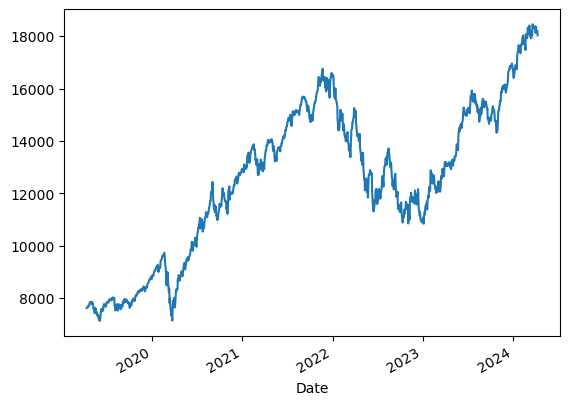

In [63]:
ndx_df.set_index("Date",inplace=True)
ndx_df["High"].plot()

<Axes: xlabel='Date'>

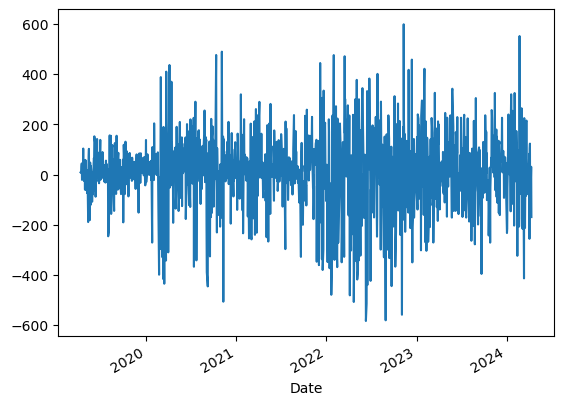

In [64]:
ndx_df["Daily Change"] = ndx_df['High'].diff()
largest_climbs = ndx_df["Daily Change"].sort_values(ascending=False).head(5)
largest_drops  = ndx_df["Daily Change"].sort_values(ascending=True).head(5)
ndx_df["Daily Change"].plot()


In [65]:
print("\nTop 5 Largest Climbs\n=========================")
print(largest_climbs)
print("\nTop 5 Largest Drops\n=========================")
print(largest_drops)


Top 5 Largest Climbs
Date
2022-11-10    599.540039
2024-02-22    552.669922
2020-11-04    490.379883
2020-10-12    477.150391
2022-01-31    476.739258
Name: Daily Change, dtype: float64

Top 5 Largest Drops
Date
2022-06-10   -583.719726
2022-08-29   -580.910156
2022-11-03   -558.730468
2022-06-13   -514.040039
2022-04-22   -507.809570
Name: Daily Change, dtype: float64


In [70]:
largest_climbs_df = largest_climbs.to_frame()
largest_climbs_df = pd.merge(largest_climbs_df, headlines_df, on='Date', how="left")
largest_climbs_df


,Date,Daily Change,datetime,headline,keywords
0,2022-11-10,599.540039,2022-11-10 10:05:10+00:00,Inflation Starting to Taper In Positive Sign f...,"[United States Economy, Inflation (Economics),..."
1,2022-11-10,599.540039,2022-11-10 10:00:35+00:00,Corporate Bond Fears Are Rising With Rates,"[Stocks and Bonds, Interest Rates, Inflation (..."
2,2024-02-22,552.669922,NaT,NaN,NaN
3,2020-11-04,490.379883,NaT,NaN,NaN
4,2020-10-12,477.150391,NaT,NaN,NaN
5,2022-01-31,476.739258,2022-01-31 22:36:01+00:00,Fed Officials To Pull Back Their Help,"[Banking and Financial Institutions, United St..."
6,2022-01-31,476.739258,2022-01-31 15:08:20+00:00,Bright View On Wall St. Survives Dip,"[United States Economy, Inflation (Economics),..."


In [ ]:
#all_data_df = pd.merge(ndx_df, headlines_df, on='Date', how="left")
#display(all_data_df.head(100))
#display(all_data_df.info())